In [6]:
import numpy as np
from matplotlib.pyplot import matplotlib as plt
%matplotlib inline
import pandas as pd


In [3]:
train = pd.read_csv(r"C:\Users\HP\Desktop\project-larawehbe\data\train.csv")
test = pd.read_csv(r"C:\Users\HP\Desktop\project-larawehbe\data\test.csv")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
survival_by_class = train.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
train.dropna(subset=['Embarked'],inplace=True)

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

numeric_features = ["Age"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_features = ["Sex","Embarked"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


train['Title'] = train['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)


bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

print(train[['Age', 'AgeGroup']].head())


    Age     AgeGroup
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0  Young Adult
4  35.0  Young Adult


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",categorical_transformer,categorical_features),
        ("num",numeric_transformer,numeric_features)
    ]
)

In [29]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 13), (178, 13), (711,), (178,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()

In [37]:
randomF_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(random_state=42))
])

randomF_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [42]:
y_pred = randomF_pipeline.predict(X_test)
y_pred[:50]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0])

In [43]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


In [44]:
logreg_pipeline.fit(X_train, y_train)
logreg_pred = logreg_pipeline.predict(X_test)

logreg_pred[:50]


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1])

In [60]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


result = {'Logistic Regression Accuracy':accuracy_score(y_test, logreg_pred),
          'Random Forest Accuracy':accuracy_score(y_test, y_pred)
          }


Logistic Regression Accuracy: 0.797752808988764
Random Forest Accuracy: 0.7247191011235955


In [59]:

scores = cross_val_score(randomF_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.74719101 0.76404494 0.75842697 0.71348315 0.75706215]
Mean accuracy: 0.7480416428616771


<Axes: >

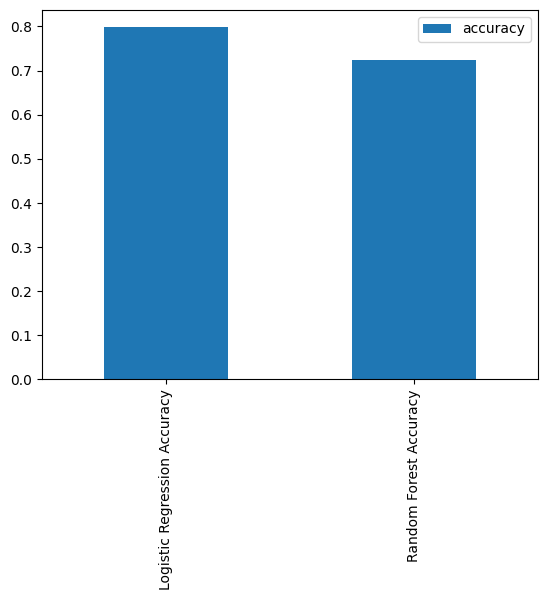

In [62]:
results_df=pd.DataFrame(result.values(),
                        result.keys(),
                        columns=['accuracy'])
results_df

results_df.plot.bar()

In [69]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

In [71]:
confusion_matrix(y_test,y_pred)

array([[84, 25],
       [24, 45]])

In [72]:
import seaborn as sns

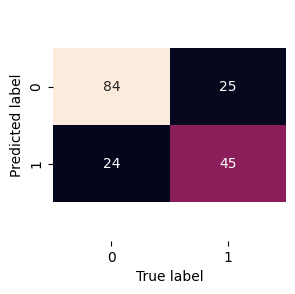

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_pred)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       109
           1       0.64      0.65      0.65        69

    accuracy                           0.72       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.72      0.73       178



In [78]:
precision_score(y_test, y_pred)

0.6428571428571429

In [80]:
recall_score(y_test,y_pred)

0.6521739130434783

In [81]:
f1_score(y_test,y_pred)

0.6474820143884892

In [82]:
from joblib import load,dump

dump(clf,"clf_model.joblib")

['clf_model.joblib']

now we want to try on the test.csv file


In [83]:
test_df = pd.read_csv(r"C:\Users\HP\Desktop\project-larawehbe\data\test.csv")

In [84]:
test_df['Title'] = test_df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)


bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

In [85]:
test_predictions = randomF_pipeline.predict(test_df)

In [86]:
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

In [87]:
submission_df.to_csv("titanic_predictions_on_testfile.csv", index=False)